**AI-Usage** 

I utilized chat gpt to help me throughout this process. It gave me an outline of how to extract the features and target variables, intialize the models, and compute performance metrics to analyze the different models. After understanding how to perform this process for one model, I got help creating loops to loop through the different models and print out the performance metrics in an organized manner. Upon completing this portion of the machine learning process, it helped guide me towards understanding which features are most important and how to make predictions for a specfic player's passing yards. I provided more details towards how I engineered the code using prompts above their code blocks. 

The code developed in this file was guided by this conversation with ChatGPT.

**Here is the link to that chat:** https://chatgpt.com/share/67a7d9ef-d054-800f-a70d-36bf42bdf994

In [138]:
import pandas as pd
import numpy as np

# Load the dataset
qb_df = pd.read_csv("player_position_dataframes/qb_advanced_stats_rolling_2024.csv")

display(qb_df)

,player_id,player_name,position,recent_team,week,season_type,opponent_team,completions,attempts,passing_yards,...,completions_season_avg,attempts_season_avg,completion_pct_season_avg,yards_per_attempt_season_avg,td_pct_season_avg,int_pct_season_avg,passer_rating_season_avg,adjusted_net_yards_per_attempt_season_avg,rushing_yards_season_avg,yards_per_carry_season_avg
0,00-0023459,A.Rodgers,QB,NYJ,1,REG,SF,13,21.0,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0023459,A.Rodgers,QB,NYJ,2,REG,TEN,18,30.0,176.0,...,13.000000,21.000000,61.904762,7.952381,4.761905,4.761905,82.837302,6.227273,-1.0,-1.000000
2,00-0023459,A.Rodgers,QB,NYJ,3,REG,NE,27,35.0,281.0,...,15.500000,25.500000,60.952381,6.909524,5.714286,2.380952,90.793651,6.301136,0.0,-0.250000
3,00-0023459,A.Rodgers,QB,NYJ,4,REG,DEN,24,42.0,225.0,...,19.333333,28.666667,66.349206,7.282540,5.714286,1.587302,100.152116,6.966523,6.0,1.833333
4,00-0023459,A.Rodgers,QB,NYJ,5,REG,MIN,29,54.0,244.0,...,20.500000,32.000000,64.047619,6.801190,4.285714,1.190476,93.120040,6.203616,11.0,2.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,00-0039918,C.Williams,QB,CHI,14,REG,SF,17,23.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,00-0039918,C.Williams,QB,CHI,15,REG,MIN,18,31.0,191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,00-0039918,C.Williams,QB,CHI,16,REG,DET,26,40.0,334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,00-0039918,C.Williams,QB,CHI,17,REG,SEA,16,28.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Put 0s back in the dataframe for features 
qb_df.replace(np.nan, 0, inplace=True)

# qb_df = pd.get_dummies(qb_df, columns=['recent_team', 'opponent_team'], drop_first=True)

# X = qb_df.drop(columns=['player_id', 'player_name'])

display(qb_df)

,player_id,player_name,position,recent_team,week,season_type,opponent_team,completions,attempts,passing_yards,...,completions_season_avg,attempts_season_avg,completion_pct_season_avg,yards_per_attempt_season_avg,td_pct_season_avg,int_pct_season_avg,passer_rating_season_avg,adjusted_net_yards_per_attempt_season_avg,rushing_yards_season_avg,yards_per_carry_season_avg
0,00-0023459,A.Rodgers,QB,NYJ,1,REG,SF,13,21.0,167.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,00-0023459,A.Rodgers,QB,NYJ,2,REG,TEN,18,30.0,176.0,...,13.000000,21.000000,61.904762,7.952381,4.761905,4.761905,82.837302,6.227273,-1.0,-1.000000
2,00-0023459,A.Rodgers,QB,NYJ,3,REG,NE,27,35.0,281.0,...,15.500000,25.500000,60.952381,6.909524,5.714286,2.380952,90.793651,6.301136,0.0,-0.250000
3,00-0023459,A.Rodgers,QB,NYJ,4,REG,DEN,24,42.0,225.0,...,19.333333,28.666667,66.349206,7.282540,5.714286,1.587302,100.152116,6.966523,6.0,1.833333
4,00-0023459,A.Rodgers,QB,NYJ,5,REG,MIN,29,54.0,244.0,...,20.500000,32.000000,64.047619,6.801190,4.285714,1.190476,93.120040,6.203616,11.0,2.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,00-0039918,C.Williams,QB,CHI,14,REG,SF,17,23.0,134.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
693,00-0039918,C.Williams,QB,CHI,15,REG,MIN,18,31.0,191.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
694,00-0039918,C.Williams,QB,CHI,16,REG,DET,26,40.0,334.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
695,00-0039918,C.Williams,QB,CHI,17,REG,SEA,16,28.0,122.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [140]:
# I have utilized AI in the process of improving the model performance. It has helped
# me interpert the results and told me how I should adjust my approach to improve on 
# the current limiations of my models. It also helped me implement weights for my features
# however they ended up not being necessary and had no affect on the model. One thing that it 
# it did help me implement was the correlation matrix which has been helpful in determining what
# features to use
# Link to conversation: https://chatgpt.com/share/67b67c5f-34d0-800f-b7ee-5d1104c030b2

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Features (independent variables)
features = ['completions_rolling_3', 
            'attempts_rolling_3', 
            'yards_per_attempt_rolling_3',
            "passer_rating_season_avg", 
            "adjusted_net_yards_per_attempt_season_avg", 
            "rushing_yards_season_avg", 
            "yards_per_carry_season_avg"
            ]

# # Define manual weights based on domain knowledge
# manual_weights = {
#     'completions_rolling_3': 1,  # Slightly more important
#     'attempts_rolling_3': 1,
#     'yards_per_attempt_rolling_3': 1,
#     'passer_rating_rolling_3': 1,
#     'adjusted_net_yards_per_attempt_rolling_3': 1,
#     "passer_rating_season_avg": 1,  # High importance
#     "attempts_season_avg": 1,
#     "int_pct_season_avg": 1,  # Lower importance (negative plays)
#     "attempts_rolling_5": 1.0,
#     "completions_season_avg": 1,
#     "adjusted_net_yards_per_attempt_season_avg": 1,  # Key efficiency metric
#     "rushing_yards_season_avg": 1,  # Less predictive of passing yards
#     "yards_per_carry_season_avg": 1  # Even less impact on passing
# }

# # Apply weights to features
# for feature, weight in manual_weights.items():
#     qb_df[feature] = qb_df[feature] * weight

# print(qb_df[features].head())  # Before scaling

# Define target variable
target = "passing_yards"

# Split data
X = qb_df[features]
y = qb_df[target]


# Initialize scalar preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# scaled_X_train = X_train
# scaled_X_test = X_test

# print(qb_df[features].head())  


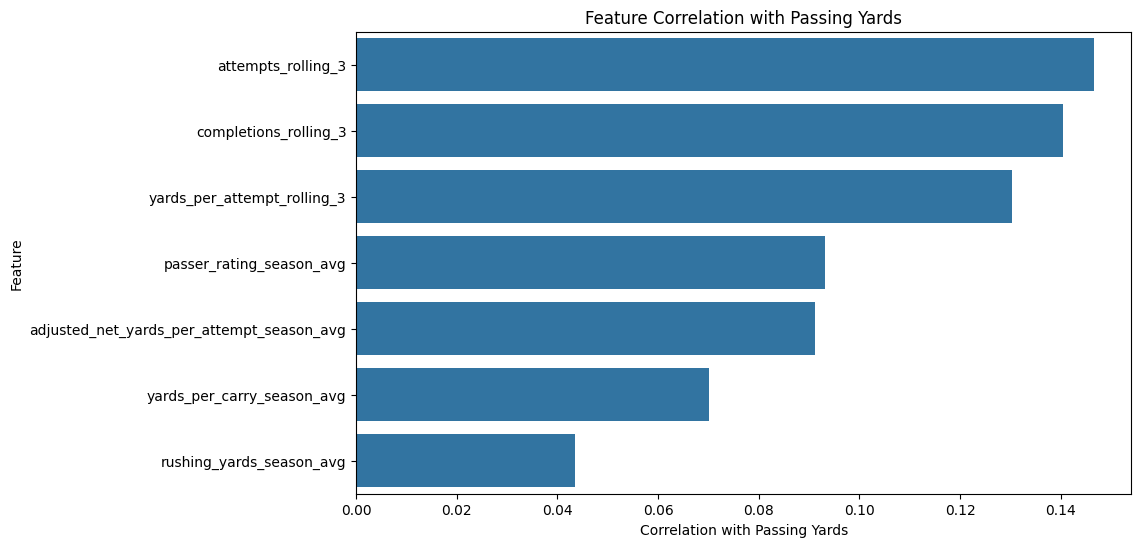

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = qb_df[features + [target]].corr()

# Get correlations with passing yards
passing_yards_corr = corr_matrix[target].drop(target).sort_values(ascending=False)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=passing_yards_corr.values, y=passing_yards_corr.index)
plt.xlabel("Correlation with Passing Yards")
plt.ylabel("Feature")
plt.title("Feature Correlation with Passing Yards")
plt.show()


In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)


In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = scaled_X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mbe = np.mean(y_pred - y_test)

# Print results
print(f"R² Score: {r2:.4f}")
# Adjust for the number of features used to help prevent overfitting
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
# Penalizes larger errors more
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Measures models tendency to over or underestimate values 
print(f"Mean Bias Error (MBE): {mbe:.2f}")

from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model with weights
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")

R² Score: 0.1005
Adjusted R² Score: 0.0356
Mean Absolute Error (MAE): 75.56
Root Mean Squared Error (RMSE): 98.35
Mean Bias Error (MBE): -3.99
Cross-validated MAE: 289.88


In [144]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Support Vector Regression": SVR(kernel="rbf", C=100, epsilon=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
    # Use cross-validation to evaluate the model with weights
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Linear Regression
R² Score: 0.1005
Adjusted R² Score: 0.0356
Mean Absolute Error (MAE): 75.56
Root Mean Squared Error (RMSE): 98.35
Mean Bias Error (MBE): -3.99
Cross-validated MAE: 289.88


Model: Ridge Regression
R² Score: 0.1071
Adjusted R² Score: 0.0427
Mean Absolute Error (MAE): 75.33
Root Mean Squared Error (RMSE): 97.98
Mean Bias Error (MBE): -3.35
Cross-validated MAE: 289.88


Model: Lasso Regression
R² Score: 0.1068
Adjusted R² Score: 0.0423
Mean Absolute Error (MAE): 75.32
Root Mean Squared Error (RMSE): 98.01
Mean Bias Error (MBE): -3.28
Cross-validated MAE: 289.88


Model: Elastic Net
R² Score: 0.1015
Adjusted R² Score: 0.0367
Mean Absolute Error (MAE): 75.55
Root Mean Squared Error (RMSE): 98.29
Mean Bias Error (MBE): -1.65
Cross-validated MAE: 289.88


Model: Support Vector Regression
R² Score: 0.0734
Adjusted R² Score: 0.0065
Mean Absolute Error (MAE): 75.17
Root Mean Squared Error (RMSE): 99.82
Mean Bias Error (MBE): 11.57
Cross-validated MAE: 289.88


Model: KNN

In [145]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth = 7,learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0),
}

# Train and evaluate each model
for name, mdl in models.items():
    mdl.fit(scaled_X_train, y_train)
    y_pred = mdl.predict(scaled_X_test)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = scaled_X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mbe = np.mean(y_pred - y_test)
    
    # Print results with dividers
    print("=" * 50)  # Divider
    print(f"Model: {name}")
    print("=" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adjusted_r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Bias Error (MBE): {mbe:.2f}")
     # Use cross-validation to evaluate the model with weights
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-validated MAE: {-cv_scores.mean():.2f}")
    print("\n")  # Blank line for spacing

Model: Random Forest
R² Score: 0.1880
Adjusted R² Score: 0.1294
Mean Absolute Error (MAE): 74.14
Root Mean Squared Error (RMSE): 93.44
Mean Bias Error (MBE): -1.64
Cross-validated MAE: 289.88


Model: Gradient Boosting
R² Score: 0.1398
Adjusted R² Score: 0.0777
Mean Absolute Error (MAE): 76.65
Root Mean Squared Error (RMSE): 96.18
Mean Bias Error (MBE): -2.70
Cross-validated MAE: 289.88


Model: XGBoost
R² Score: 0.1648
Adjusted R² Score: 0.1046
Mean Absolute Error (MAE): 75.31
Root Mean Squared Error (RMSE): 94.77
Mean Bias Error (MBE): -3.86
Cross-validated MAE: 289.88


Model: CatBoost
R² Score: 0.1886
Adjusted R² Score: 0.1300
Mean Absolute Error (MAE): 73.52
Root Mean Squared Error (RMSE): 93.41
Mean Bias Error (MBE): -4.20
Cross-validated MAE: 289.88




I was curious how to determine which features were the most significant. I asked ChatGPT how to tell which features were the most significant to my predicitions ,and it helped me to sort and plot my features. I had not seen this before in machine learning ,and it seems like it will be a useful tool when fine tuning the features for the different predicition models

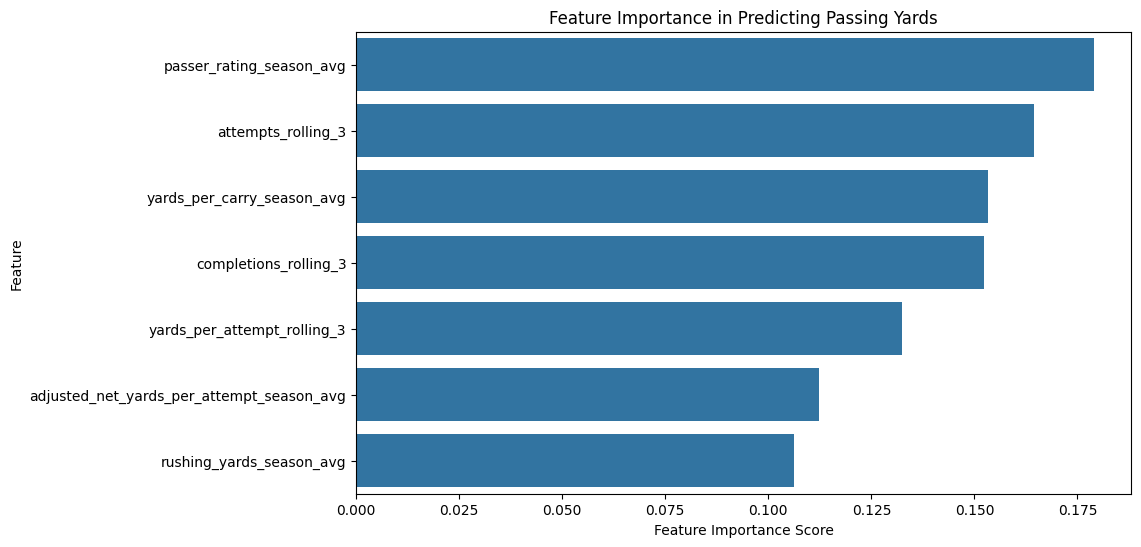

In [146]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# Train a basic Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(scaled_X_train, y_train)

gb = GradientBoostingRegressor(n_estimators=100, max_depth = 7,learning_rate=0.1, random_state=42)

gb.fit(scaled_X_train, y_train)
GradientBoostingRegressor(n_estimators=100, max_depth = 7,learning_rate=0.1, random_state=42)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Passing Yards")
plt.show()
plt.show()

I asked ChatGPT for help on how to use my model to obtain a predicition for a specfic player. It helped provide a framework which I modified to fit the process of how I processed the data, extracted features, and created the models. Once I got the prediction for Aaron Rodgers to work correctly, I provided it with the list of qb's and asked it to help implement a method which went through each qb in the list and performed the predicition process for their week 18 passing yards. The below code is a result of that series of prompts with ChatGPT.

In [147]:
qb_list = ['A.Rodgers', 'J.Flacco', 'J.Johnson', 'M.Stafford', 'A.Dalton', 'T.Taylor',
 'R.Wilson', 'K.Cousins', 'G.Smith', 'T.Bridgewater', 'D.Carr', 'J.Garoppolo',
 'J.Winston', 'T.Heinicke', 'M.Mariota', 'B.Allen', 'C.Wentz', 'D.Prescott',
 'J.Goff', 'J.Brissett', 'N.Mullens', 'D.Watson', 'C.Rush', 'M.Trubisky',
 'P.Mahomes', 'J.Dobbs', 'T.Boyle', 'M.White', 'K.Allen', 'M.Rudolph',
 'L.Jackson', 'B.Mayfield', 'J.Allen', 'S.Darnold', 'J.Browning', 'K.Murray',
 'J.Stidham', 'G.Minshew', 'D.Lock', 'D.Jones', 'T.Huntley', 'T.Tagovailoa',
 'J.Love', 'J.Herbert', 'J.Hurts', 'J.Burrow', 'D.Mills', 'K.Trask', 'J.Fields',
 'T.Lawrence', 'M.Jones', 'T.Lance', 'S.Howell', 'C.Oladokun', 'S.Thompson',
 'B.Purdy', 'K.Pickett', 'B.Zappe', 'D.Ridder', 'M.Willis', 'T.McKee',
 'T.Bagent', 'T.DeVito', 'H.Hooker', "A.O'Connell", 'C.Tune',
 'D.Thompson-Robinson', 'J.Haener', 'B.Young', 'W.Levis', 'C.Stroud',
 'A.Richardson', 'S.Rattler', 'J.Milton', 'B.Nix', 'D.Maye', 'J.Daniels',
 'M.Penix', 'C.Williams']

print("=" * 60)
print("WEEK 18 PASSING YARDS PREDICTIONS")
print("=" * 60)

for qb in qb_list:
    # Filter dataset for current QB in Week 18
    qb_data = qb_df[(qb_df['player_name'] == qb) & (qb_df['week'] == 18)]

    if not qb_data.empty:
        # Extract features and scale
        qb_X = qb_data[features]
        scaled_features = scaler.transform(qb_X)

        # Predict passing yards
        predicted_yards_rf = rf.predict(scaled_features)[0]
        predicted_yards_gb = gb.predict(scaled_features)[0]

        print(f"{qb}:")
        print(f"   - Random Forest: {predicted_yards_rf:.2f} yards")
        print(f"   - Gradient Boosting: {predicted_yards_gb:.2f} yards")
        print("-" * 50)
    else:
        print(f"No Week 18 data found for {qb}")

print("=" * 60)


WEEK 18 PASSING YARDS PREDICTIONS
A.Rodgers:
   - Random Forest: 252.83 yards
   - Gradient Boosting: 273.73 yards
--------------------------------------------------
J.Flacco:
   - Random Forest: 254.57 yards
   - Gradient Boosting: 263.89 yards
--------------------------------------------------
No Week 18 data found for J.Johnson
No Week 18 data found for M.Stafford
No Week 18 data found for A.Dalton
No Week 18 data found for T.Taylor
R.Wilson:
   - Random Forest: 173.24 yards
   - Gradient Boosting: 148.69 yards
--------------------------------------------------
No Week 18 data found for K.Cousins
G.Smith:
   - Random Forest: 234.96 yards
   - Gradient Boosting: 223.42 yards
--------------------------------------------------
No Week 18 data found for T.Bridgewater
No Week 18 data found for D.Carr
J.Garoppolo:
   - Random Forest: 270.20 yards
   - Gradient Boosting: 333.79 yards
--------------------------------------------------
No Week 18 data found for J.Winston
No Week 18 data foun